In [1]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [2]:
from keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    metrics=['acc']
)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory('train_dir',target_size=(150, 150), batch_size=20,class_mode='binary') 
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_directory('Val_dir',target_size=(150, 150), batch_size=20,class_mode='binary')                                     

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


C:\Users\alogi\AppData\Local\Temp\ipykernel_44804\984291649.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


100/100 [==============================] - 25s 243ms/step - loss: 0.6921 - acc: 0.5260 - val_loss: 0.6837 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 24s 240ms/step - loss: 0.6797 - acc: 0.5740 - val_loss: 0.6828 - val_acc: 0.5310
Epoch 3/30
100/100 [==============================] - 24s 241ms/step - loss: 0.6598 - acc: 0.6075 - val_loss: 0.6647 - val_acc: 0.5820
Epoch 4/30
100/100 [==============================] - 25s 246ms/step - loss: 0.6352 - acc: 0.6460 - val_loss: 0.6362 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: 0.6088 - acc: 0.6695 - val_loss: 0.6228 - val_acc: 0.6460
Epoch 6/30
100/100 [==============================] - 24s 243ms/step - loss: 0.5715 - acc: 0.7070 - val_loss: 0.7049 - val_acc: 0.5870
Epoch 7/30
100/100 [==============================] - 25s 245ms/step - loss: 0.5426 - acc: 0.7275 - val_loss: 0.5908 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 24s 244ms/st

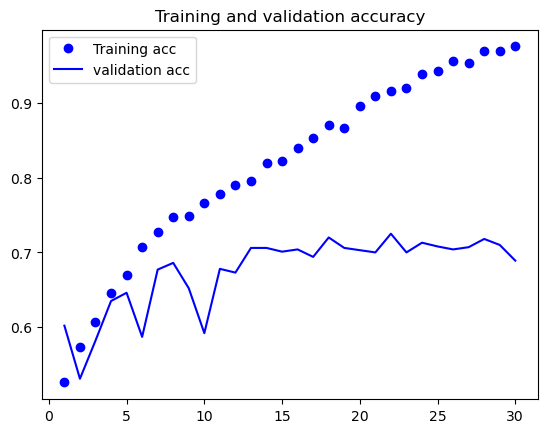

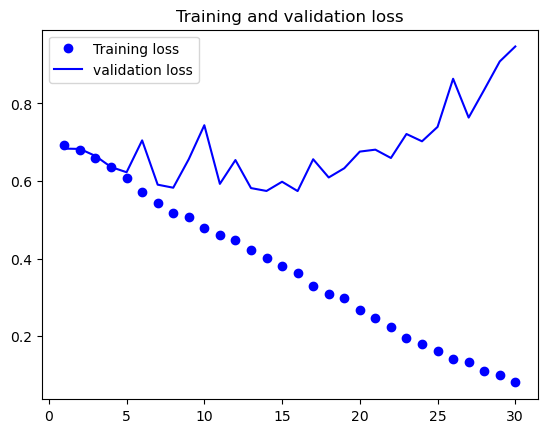

In [5]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()


In [6]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [7]:
from keras.preprocessing import image
import os
fnames=[os.path.join('train_dir\\Cat_train',fname) for fname in os.listdir('train_dir\\Cat_train')]
img_path=fnames[2]
img=image.load_img(img_path,target_size=(150,150))
X=image.img_to_array(img)
X=X.reshape((1,)+X.shape)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=0.0001),
 metrics=['acc'])

In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [21]:
import os
import frozenlist
import numpy as np
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_feat(dir, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for batch, labels_batch in generator:
        feature_batch = conv_base.predict(batch)
        features[i * batch_size:(i + 1) * batch_size] = feature_batch
        labels[i * batch_size:(i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [23]:
train_features,train_labels=extract_feat('train_dir',2000)
validation_features,validation_labels=extract_feat('Val_dir',1000)
test_features,test_labels=extract_feat('test_dir',1000)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 649ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 585ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 648ms/step


In [24]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))


In [25]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 12ms/step - loss: 0.4594 - acc: 0.7740 - val_loss: 0.3253 - val_acc: 0.8540
Epoch 2/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2984 - acc: 0.8800 - val_loss: 0.3196 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2480 - acc: 0.9025 - val_loss: 0.2676 - val_acc: 0.8870
Epoch 4/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2052 - acc: 0.9195 - val_loss: 0.2433 - val_acc: 0.8930
Epoch 5/30
100/100 [==============================] - 1s 10ms/step - loss: 0.1759 - acc: 0.9280 - val_loss: 0.2384 - val_acc: 0.9000
Epoch 6/30
100/100 [==============================] - 1s 10ms/step - loss: 0.1593 - acc: 0.9400 - val_loss: 0.2509 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 1s 10ms/step - loss: 0.1439 - acc: 0.9455 - val_loss: 0.2361 - val_acc: 0.9020
Epoch 8/30
100/100 [==============================] - 1s 11ms/step - 

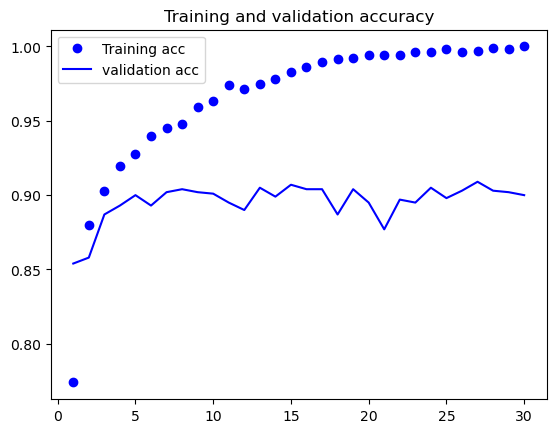

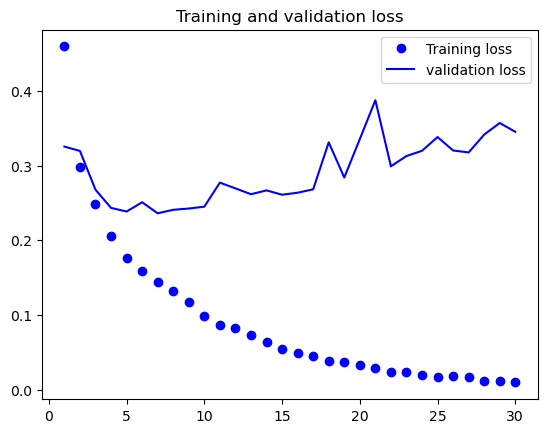

In [26]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
